In [11]:
from PIL import Image
import matplotlib.pyplot as plt

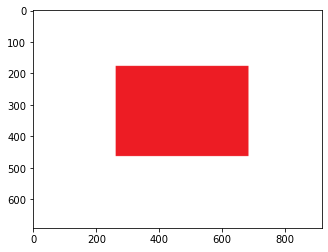

In [12]:
#Load and display original image
img = Image.open('Untitled.png')
input_image = img.load()
plt.imshow(img)

In [13]:
def floodfill(input_image,width,height,u,v,s_r,s_g,s_b):
    #Initializing the visit state of image pixels for use in queue later on
    visited = []
    for i in range(height):
        visited.append([False for j in range(width)]) 
        
    #Initial colour of selected pixel
    base_r,base_g,base_b=input_image[u,v]
    
    #Visiting and colouring pixels with the same initial colour as that of the selected pixel
    queue = [(u, v)]
    while queue:
        index = queue.pop()
        i = index[0]
        j = index[1]
        visited[i][j] = True     #Mark as visited
        #Check if colour is same as selected pixel
        if input_image[i,j][0]==base_r and input_image[i,j][1]==base_g and input_image[i,j][2]==base_b:
            input_image[i, j] = (s_r, s_g, s_b) 
            neighbours = bfs(i, j, height, width,visited)
            for n in neighbours:
                queue.append(n) #Add pixels to queue to possibly be coloured later on
                    
def bfs(i, j, n, m,visited) :
    #This function checks and returns all neighbouring pixels that have not yet been visited
    arr = []
    if i-1 >= 0 and j-1 >= 0 and not visited[i-1][j-1]:
        arr.append((i-1, j-1))
    if i-1 >= 0 :
        arr.append((i-1, j))
    if i-1 >= 0 and j+1 < m and not visited[i-1][j+1]:
        arr.append((i-1, j+1))
    if j+1 < m and not visited[i][j+1]:
        arr.append((i, j+1))
    if i+1 < n and j+1 < m and not visited[i+1][j+1]:
        arr.append((i+1, j+1))
    if i+1 < n and not visited[i+1][j]:
        arr.append((i+1, j))
    if i+1 < n and j-1 >= 0 and not visited[i+1][j-1]:
        arr.append((i+1, j-1))
    if j-1 >= 0 and not visited[i][j-1]:
        arr.append((i, j-1))
    return arr

#The image has been loaded previously for displaying but the operation is repeated here for convenience
img = Image.open('Untitled.png')
input_image = img.load()

#Input image dimensions
width = img.size[1]
height = img.size[0]      

#Point selected on screen
u=500
v=300

#Handle points outside image boundaries
if u>width or u<0 or v>height or v<0:
  raise Exception("Point outside image bounds")

#Target colour
s_r,s_g,s_b=34, 139, 34

#Passing the image to the floodfill function along with other necessary parameters
floodfill(input_image,width,height,u,v,s_r,s_g,s_b)



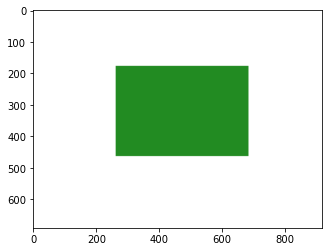

In [14]:
#Display floodfilled image
plt.imshow(img)

Code Description : The code is implemented based on Breadth First Search where all pixels of the image are initially marked as unvisited. The desired pixel to be coloured is selected along with the target colour. The function then goes through all unvisited neighbours, expanding radially and adding them to queue. If the neighbours share the same initial colour as that of the selected pixel, they are coloured.